# Introduction to Bayesian Learning
Author: Volker Krueger

## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

In [13]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image



samples_per_class = 500
number_of_classes = 10

filelist = sorted(glob.glob('data/*/*.png'))
x = np.array([np.array(Image.open(fname)) for fname in filelist])

y = np.zeros(number_of_classes * samples_per_class,dtype=int)
for cls in range(1,number_of_classes):
    y[(cls*500):(cls+1)*500] = cls   



## Visualizing the Dataset

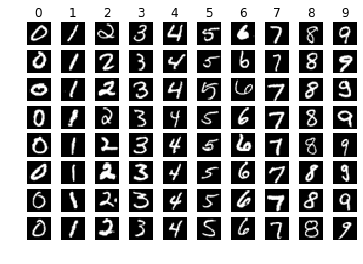

In [14]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()

## Mean

compute the mean of each class and display

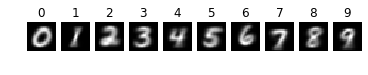

In [15]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    mean_of_class[cls]=np.mean(x[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()


## Generate Training and Testing data, and visualize

In [16]:
#######################################################################
# x_train will contain the training data
# y_train will contain the correct classes of the training data
# x_test will contain the test data
# y_test will contain the correct classes for the test data
#######################################################################
x_train=np.zeros((4000,20,20))
y_train=np.zeros(4000)
x_test =np.zeros((1000,20,20))
y_test =np.zeros(1000)

for cls in range(number_of_classes):
    idx=cls*400
    idx1=cls*500
    idx2=cls*100
    x_train[idx:idx+400,:,:]=x[idx1:idx1+400,:,:]
    y_train[idx:idx+400]=y[idx1:idx1+400]
    x_test[idx2:idx2+100,:,:]=x[idx1+400:idx1+500,:,:]
    y_test[idx2:idx2+100]=y[idx1+400:idx1+500]

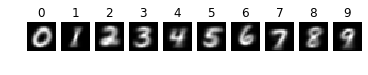

In [17]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    mean_of_class[cls]=np.mean(x_train[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

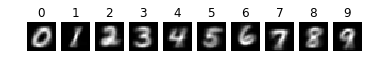

In [18]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_test == cls)[0]
    mean_of_class[cls]=np.mean(x_test[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

## put your code for the naive Bayesian classifier here

In [19]:
import scipy.stats

def normpdf(x, mu, sigma):
    u = (x-mu)/abs(sigma)
    y = (1/(sqrt(2*pi)*abs(sigma)))*exp(-u*u/2)
    return y

def mean_by_class():
    mean_of_class=np.zeros((10,20,20))
    for cls in range(number_of_classes):
        idxs = np.where(y_train == cls)[0]
        mean_of_class[cls]=np.mean(x_train[idxs],axis=0)
    return mean_of_class
    
def std_by_class():
    std_of_class=np.zeros((10,20,20))
    for cls in range(number_of_classes):
        idxs = np.where(y_train == cls)[0]
        std_of_class[cls]=np.std(x_train[idxs],axis=0)
    return std_of_class

def pxc(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(1./2)*(((x-mu)**2))/sigma**2)

#input: x_test
#output: y_test_pred
def NaiveBayesian (x_test):
    #y_test_pred=np.random.randint(10, size=len(x_test))
    y_test_pred = np.zeros(len(x_test))
    mean = mean_by_class()
    std = std_by_class()
    pdfs = []
    for i in range(number_of_classes):
        pdfs.append((mean[i],std[i]))
        
    for i in range(len(x_test)):
        max_p = 0
        pixels = x_test[i].flatten()
        
        ps_tot = np.zeros(10)
        for cls in range(number_of_classes):
            #print((mean[cls].flatten()-pixels)**2)
            sigma = std[cls].flatten()
            sigma[sigma < 0.0000000000001] = 1.0
            diff = (mean[cls].flatten()-pixels)**2
            diff[diff < 0.0000000000001] = 0.0000000000001
            pp=(diff/sigma)
            #pp = pp[np.isfinite(pp)]
            #pp[pp < 0.00001] = 1
            ps_tot[cls] = np.sum(pp)#np.linalg.norm(pp)
        #print(np.argmin(ps_tot))
        y_test_pred[i] = np.argmin(ps_tot)
        
        
        
        
        
        
        
        
       # for j in range(len(pixels)):
            
          #  ps = np.zeros(10)
            
            #for cls in range(number_of_classes):
             #   mu = mean[cls]
             #   sigma = std[cls]

             #   mu_f = mu.flatten()
            #    sigma_f = sigma.flatten()
                
                #pp = pxc(pixels[j], mu_f[j], sigma_f[j])
           #     if not sigma_f[j] > 0.0001:
          #          sigma_f[j] = 1.0
               
         #       pp=np.log(((mu_f[j]-pixels[j])/sigma_f[j])**2)  
                #pp = np.log(scipy.stats.norm.pdf(pixels[j], mu_f[j], sigma_f[j]))
        #        ps[cls] = pp
                
       #     ps_tot = np.add(ps_tot, ps)
                
      #  print(np.argmax(ps_tot))
            
        #if sigma_f[j] > 0:
                    #pp = scipy.stats.norm.pdf(pixels[j], mu_f[j], sigma_f[j])
                    #pp = (1/np.sqrt(2*np.pi*sigma**2))*pp
         #           print(pixels[j], mu_f[j], sigma_f[j])
                    #pp = pxc(pixels[j], mu_f[j], sigma_f[j])
                    #p *= pp
                #
                #p *= pp
                #if not np.isnan(pp):
                #    p *= pp
                
            
     #   y_test_pred[i] = np.argmax(ps_tot)
    
    return y_test_pred

In [20]:
0.0  
print(pxc(0, 47.84, 78.78606729619125))

0.004211109609840244


## now lets run your code and evaluate your accuracy

In [21]:
# Evaluate your classifier on the test set
y_test_pred = NaiveBayesian(x_test)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.842


## Let's visualize some of the wrongly classified test samples.

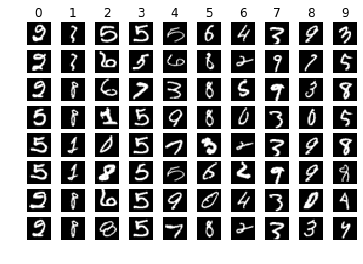

In [22]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=True)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()